In [4]:
import pandas as pd

# File paths
formatted_watch_time_path = 'formatted_watch_time.csv'
video_statistics_path = 'video_statistics.txt'
output_path = 'average_time_per_video.csv'

# Load and clean formatted watch time data
def load_watch_time(file_path):
    with open(file_path, 'r') as file:
        lines = [line for line in file if '-' not in line.split(',')[0] or len(line.split(',')) > 2]
    valid_lines = []
    for line in lines:
        parts = line.strip().split(',')
        if len(parts) >= 3:
            try:
                pd.to_datetime(parts[0], errors='raise')
                valid_lines.append(','.join(parts[:3]))
            except Exception:
                continue
    temp_path = 'temp_cleaned_watch_time.csv'
    with open(temp_path, 'w') as temp_file:
        temp_file.writelines('\n'.join(valid_lines))
    watch_time_df = pd.read_csv(temp_path, names=['Date', 'Watch Hours', 'In Cycle'])
    watch_time_df['Date'] = pd.to_datetime(watch_time_df['Date'], errors='coerce')
    watch_time_df = watch_time_df.dropna(subset=['Date'])
    watch_time_df['Watch Hours'] = watch_time_df['Watch Hours'].astype(float)
    return watch_time_df

# Load video statistics data
def load_video_statistics(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    video_data = []
    for line in lines:
        if '=' in line and 'videos watched' in line:
            try:
                date, count = line.split('=')
                date = pd.to_datetime(date.strip())
                count = int(count.split()[0])
                video_data.append({'Date': date, 'Videos Watched': count})
            except (ValueError, IndexError):
                continue
    return pd.DataFrame(video_data)

# Calculate average time per video
def calculate_time_per_video(watch_time_df, video_df):
    merged_df = pd.merge(watch_time_df, video_df, on='Date', how='inner')
    merged_df['Time per Video (min)'] = ((merged_df['Watch Hours'] * 60) / merged_df['Videos Watched']).round(2)
    return merged_df[['Date', 'Watch Hours', 'Videos Watched', 'Time per Video (min)', 'In Cycle']]

# Main function
def main():
    watch_time_df = load_watch_time(formatted_watch_time_path)
    video_df = load_video_statistics(video_statistics_path)
    result_df = calculate_time_per_video(watch_time_df, video_df)
    result_df.to_csv(output_path, index=False)
    print(f"Processed data saved to {output_path}")

if __name__ == "__main__":
    main()


Processed data saved to average_time_per_video.csv


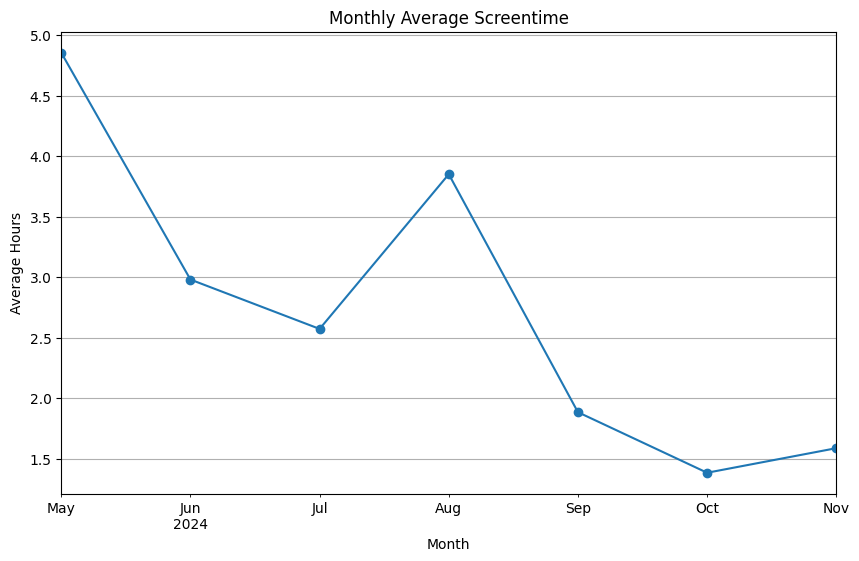

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
input_csv_path = 'average_time_per_video.csv'

# Load and process the input CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])  # Ensure valid dates
    return df

# Plot monthly average screentime
def plot_monthly_average_screentime(df):
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_avg = df.groupby('Month')['Watch Hours'].mean()
    monthly_avg.plot(kind='line', marker='o', title='Monthly Average Screentime', ylabel='Average Hours', xlabel='Month', figsize=(10, 6))
    plt.grid()
    plt.show()

# Main function
def main():
    data_df = load_data(input_csv_path)
    plot_monthly_average_screentime(data_df)

if __name__ == "__main__":
    main()


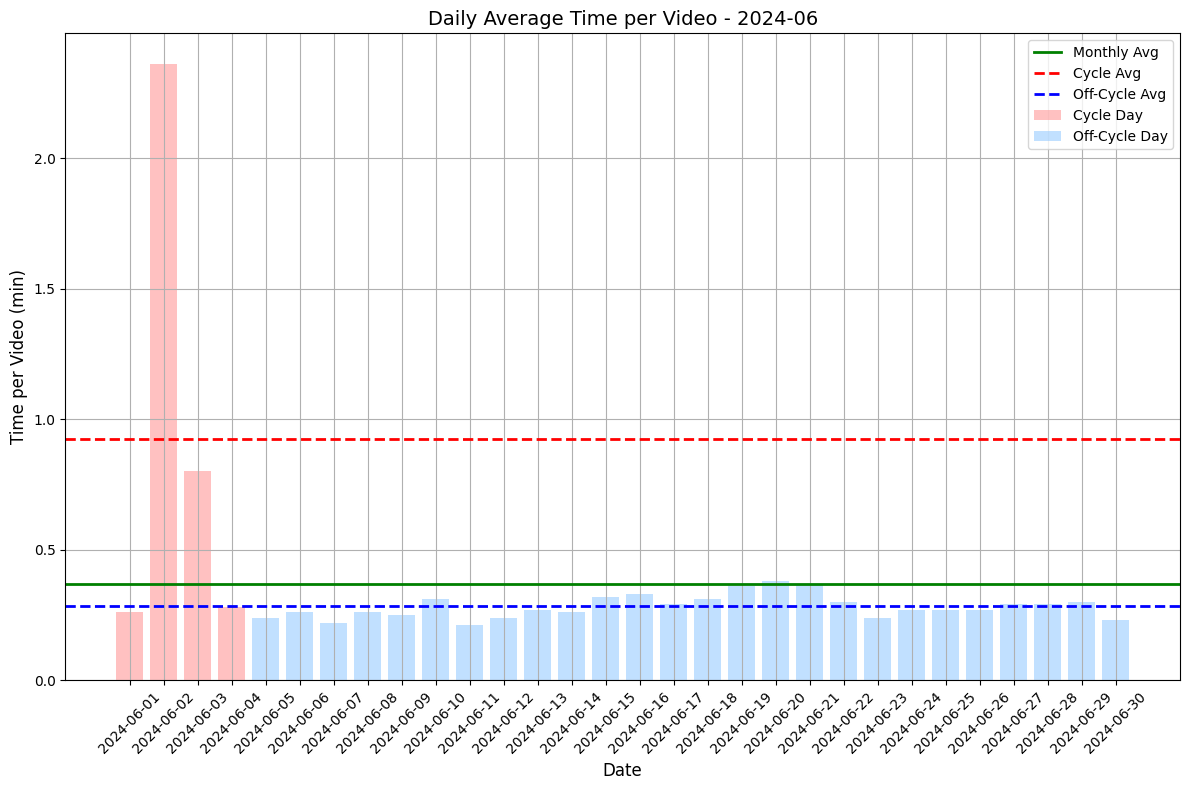

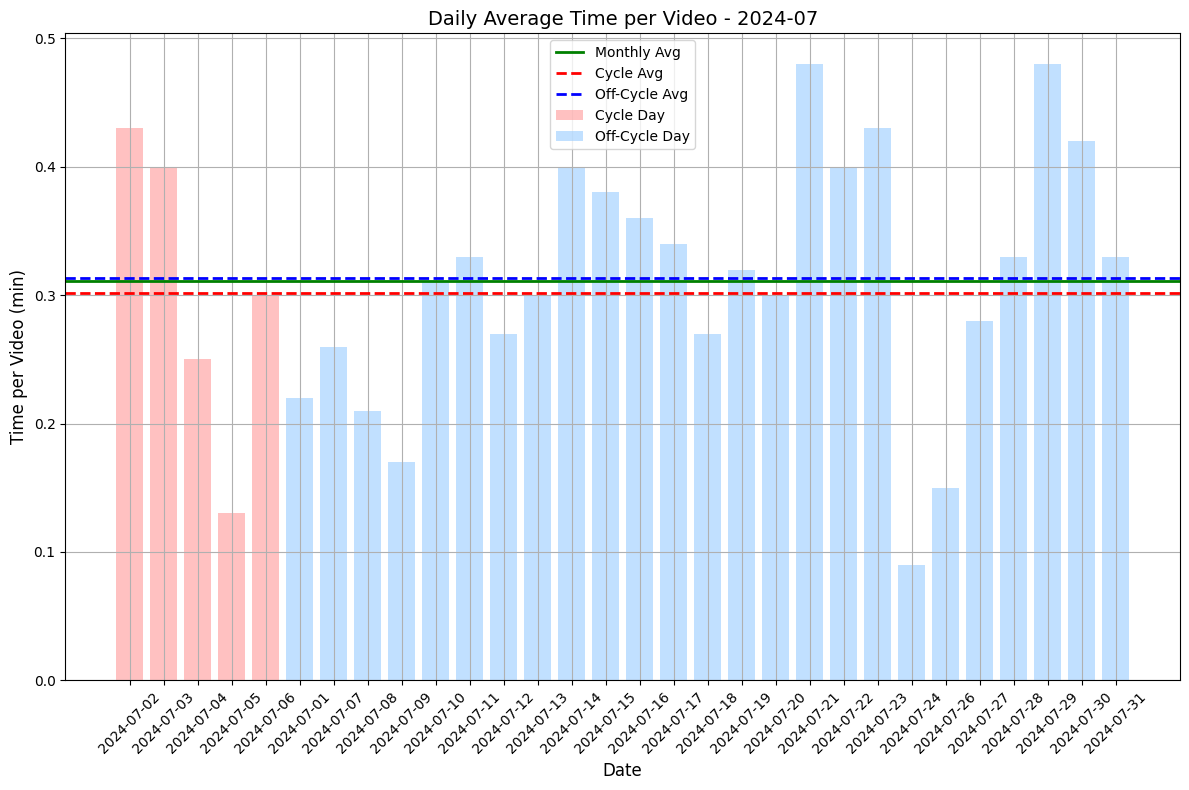

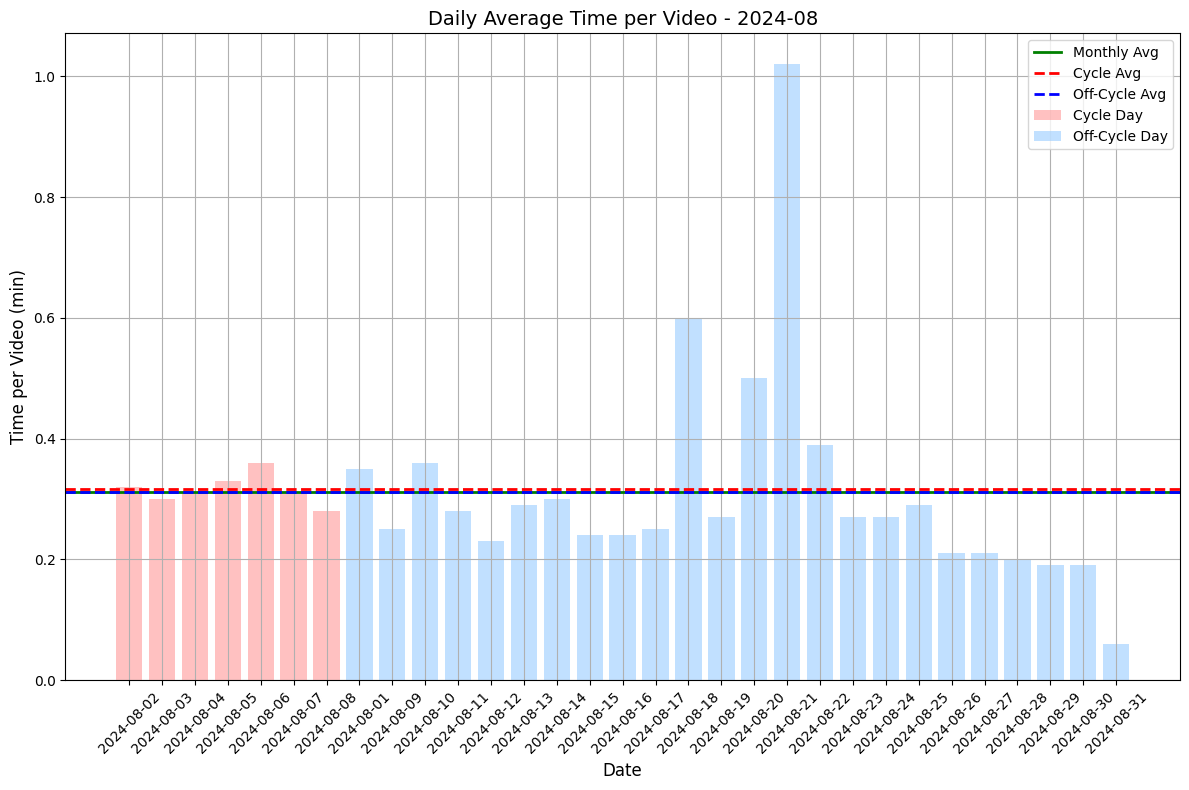

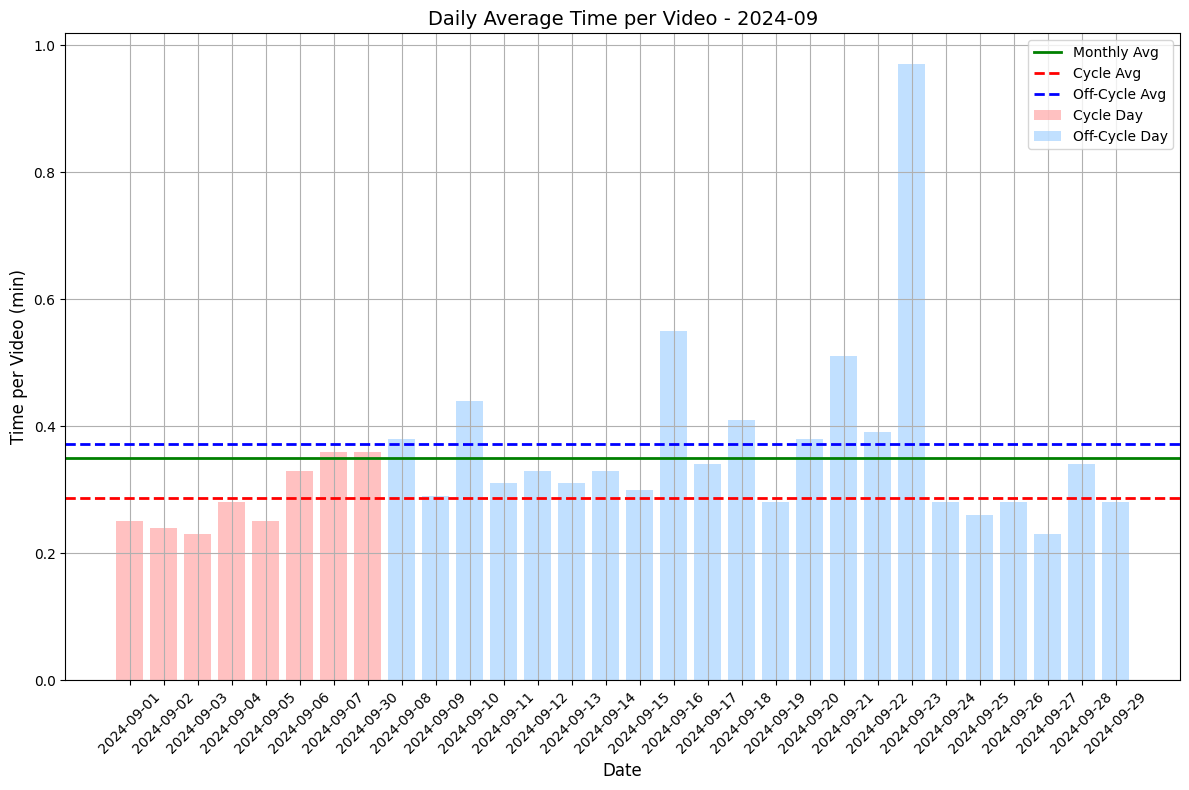

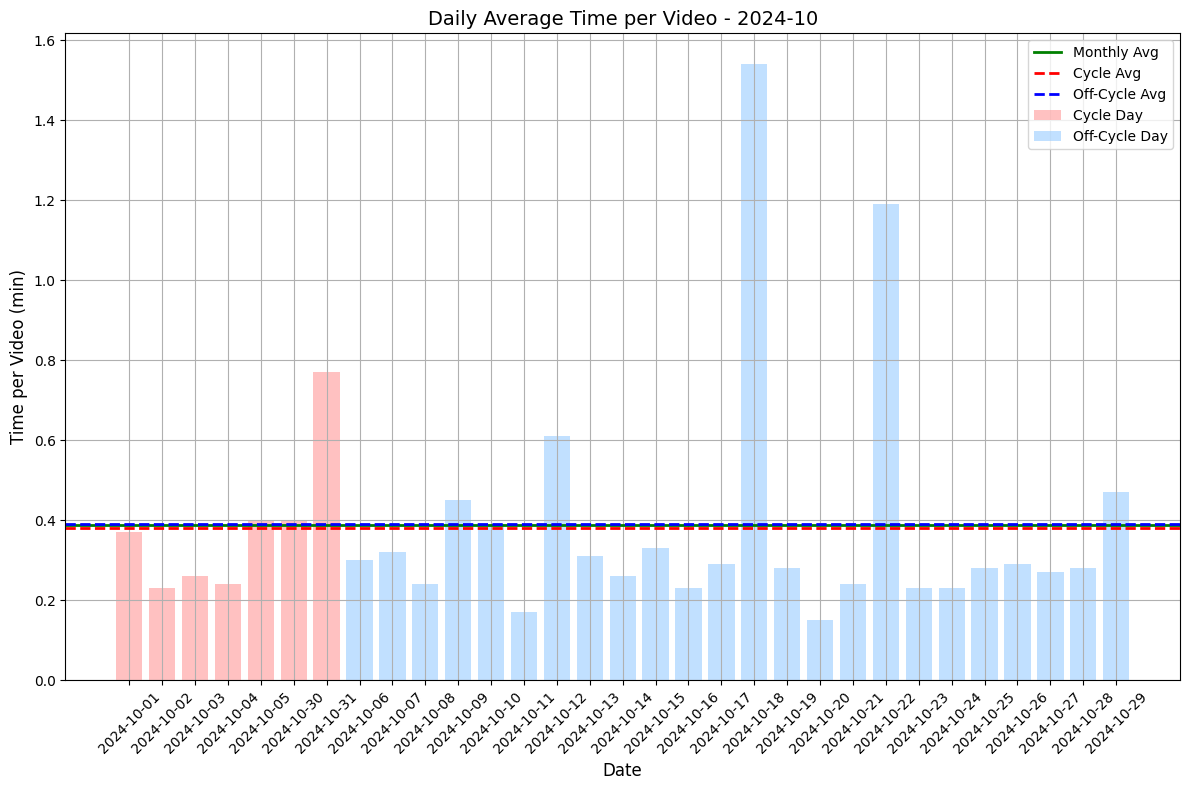

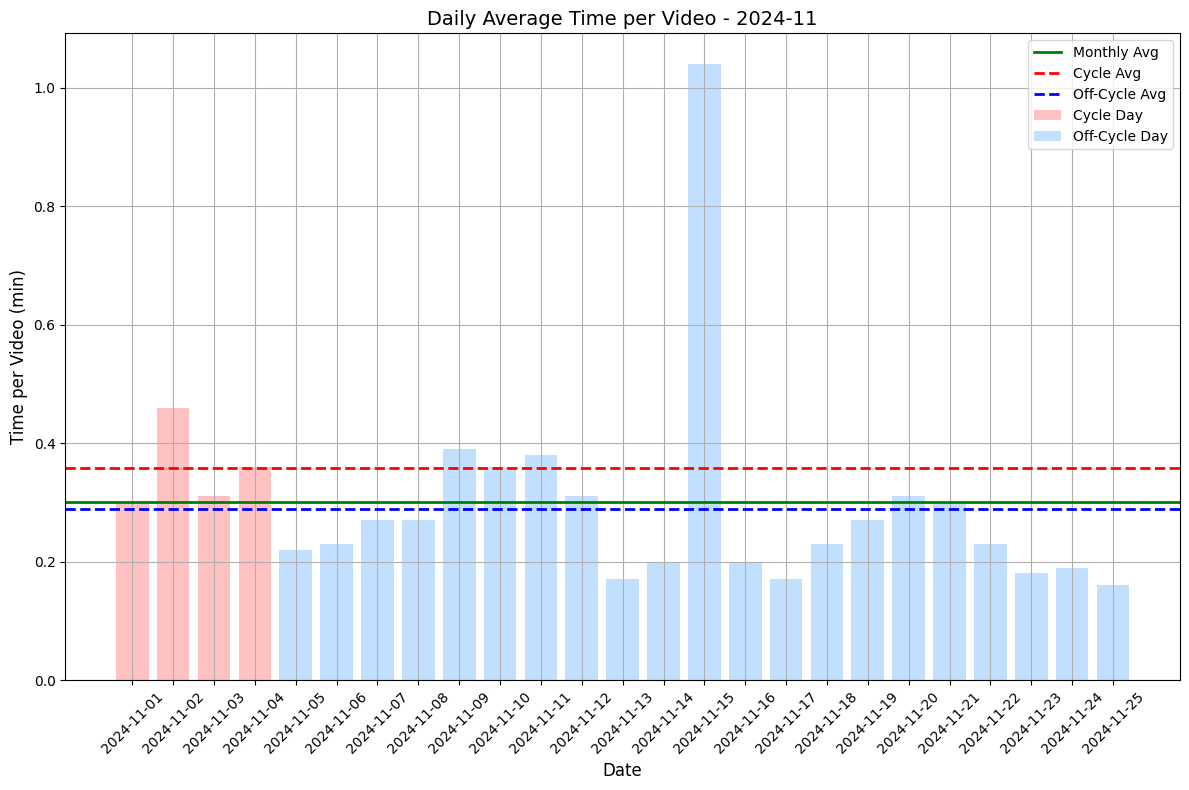

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
input_csv_path = 'average_time_per_video.csv'

# Load and process the input CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])  # Ensure valid dates
    return df

# Plot daily average time per video with cycle distinction for each month
def plot_monthly_charts(df):
    df['Month'] = df['Date'].dt.to_period('M')
    df['Cycle'] = df['In Cycle'].apply(lambda x: 'Cycle' if x == 'Yes' else 'Off-Cycle')

    # Exclude May (5th month)
    df = df[df['Date'].dt.month != 5]

    for month, month_data in df.groupby('Month'):
        # Calculate averages
        monthly_avg_time = month_data['Time per Video (min)'].mean()
        cycle_avg_time = month_data[month_data['In Cycle'] == 'Yes']['Time per Video (min)'].mean()
        off_cycle_avg_time = month_data[month_data['In Cycle'] == 'No']['Time per Video (min)'].mean()

        # Plot bar chart for daily average time per video
        plt.figure(figsize=(12, 8))
        for cycle_status, color in zip(['Cycle', 'Off-Cycle'], ['#FF9999', '#99CCFF']):
            cycle_data = month_data[month_data['Cycle'] == cycle_status]
            plt.bar(cycle_data['Date'].dt.strftime('%Y-%m-%d'),
                    cycle_data['Time per Video (min)'],
                    color=color,
                    label=f"{cycle_status} Day",
                    alpha=0.6)

        # Plot lines for monthly averages
        plt.axhline(monthly_avg_time, color='green', label='Monthly Avg', linestyle='-', linewidth=2)
        if not pd.isna(cycle_avg_time):
            plt.axhline(cycle_avg_time, color='red', label='Cycle Avg', linestyle='--', linewidth=2)
        if not pd.isna(off_cycle_avg_time):
            plt.axhline(off_cycle_avg_time, color='blue', label='Off-Cycle Avg', linestyle='--', linewidth=2)

        # Formatting the chart
        plt.title(f'Daily Average Time per Video - {month}', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Time per Video (min)', fontsize=12)
        plt.legend()
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.grid(True)
        plt.show()

# Main function
def main():
    data_df = load_data(input_csv_path)
    plot_monthly_charts(data_df)

if __name__ == "__main__":
    main()


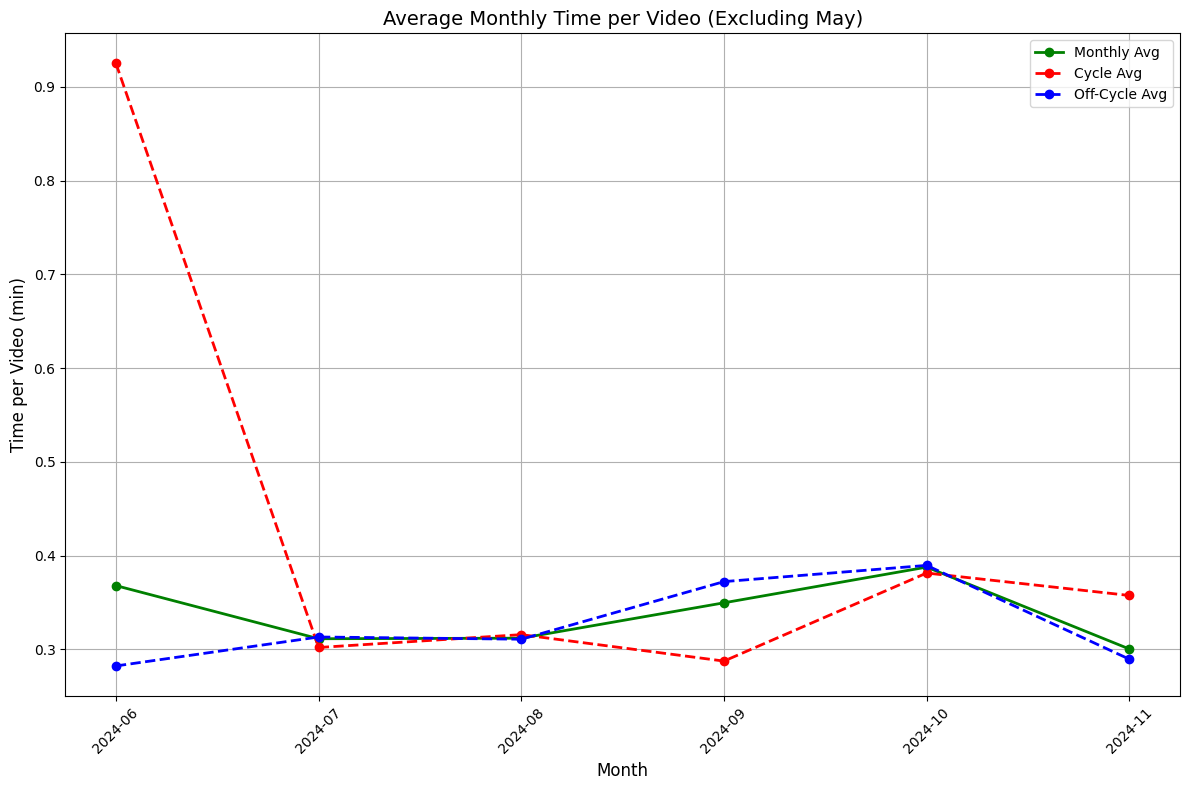

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
input_csv_path = 'average_time_per_video.csv'

# Load and process the input CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])  # Ensure valid dates
    return df

# Plot line chart for average monthly time per video and for each cycle
def plot_average_time_per_video(df):
    df['Month'] = df['Date'].dt.to_period('M')

    # Exclude May (5th month)
    df = df[df['Date'].dt.month != 5]

    # Calculate monthly averages
    monthly_avg_time = df.groupby('Month')['Time per Video (min)'].mean()
    cycle_avg_time = df[df['In Cycle'] == 'Yes'].groupby('Month')['Time per Video (min)'].mean()
    off_cycle_avg_time = df[df['In Cycle'] == 'No'].groupby('Month')['Time per Video (min)'].mean()

    # Plotting
    plt.figure(figsize=(12, 8))

    # Line chart for average monthly time per video
    plt.plot(monthly_avg_time.index.astype(str), monthly_avg_time.values, label='Monthly Avg', color='green', marker='o', linewidth=2)

    # Line chart for cycle and off-cycle averages
    plt.plot(cycle_avg_time.index.astype(str), cycle_avg_time.values, label='Cycle Avg', linestyle='--', color='red', marker='o', linewidth=2)
    plt.plot(off_cycle_avg_time.index.astype(str), off_cycle_avg_time.values, label='Off-Cycle Avg', linestyle='--', color='blue', marker='o', linewidth=2)

    # Formatting the chart
    plt.title('Average Monthly Time per Video (Excluding May)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Time per Video (min)', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Main function
def main():
    data_df = load_data(input_csv_path)
    plot_average_time_per_video(data_df)

if __name__ == "__main__":
    main()
